In [1]:
import os, sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy import optimize
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.font_manager as font_manager
from tqdm.autonotebook import tqdm
from matplotlib.backends.backend_pdf import PdfPages
import time
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy import stats
import scipy.stats

import etroc0_benchtest

C:\Users\qsun\AppData\Local\Continuum\anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



npoints is 2000
events_t is 1000


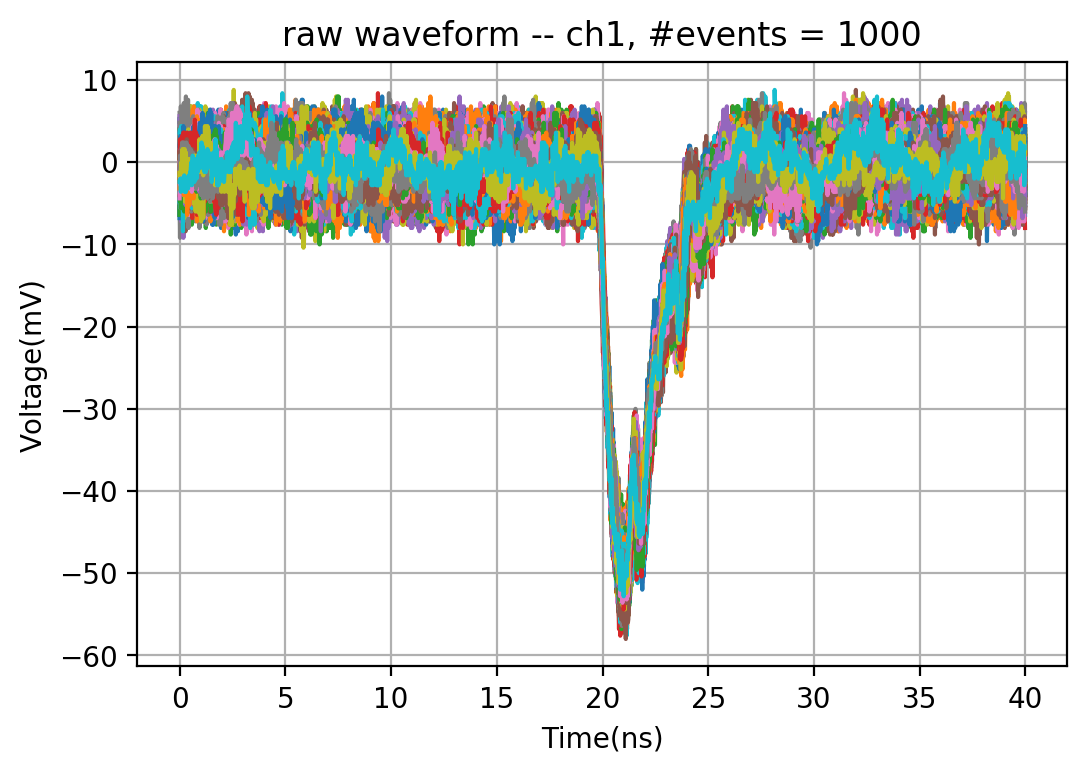

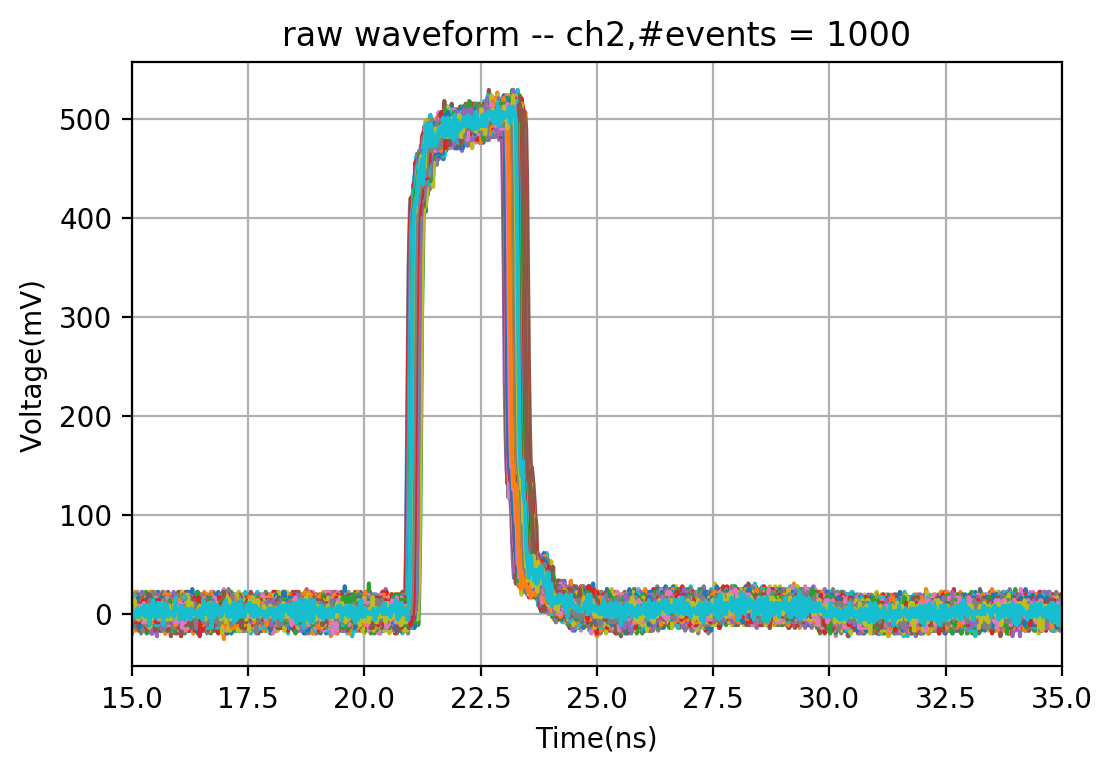

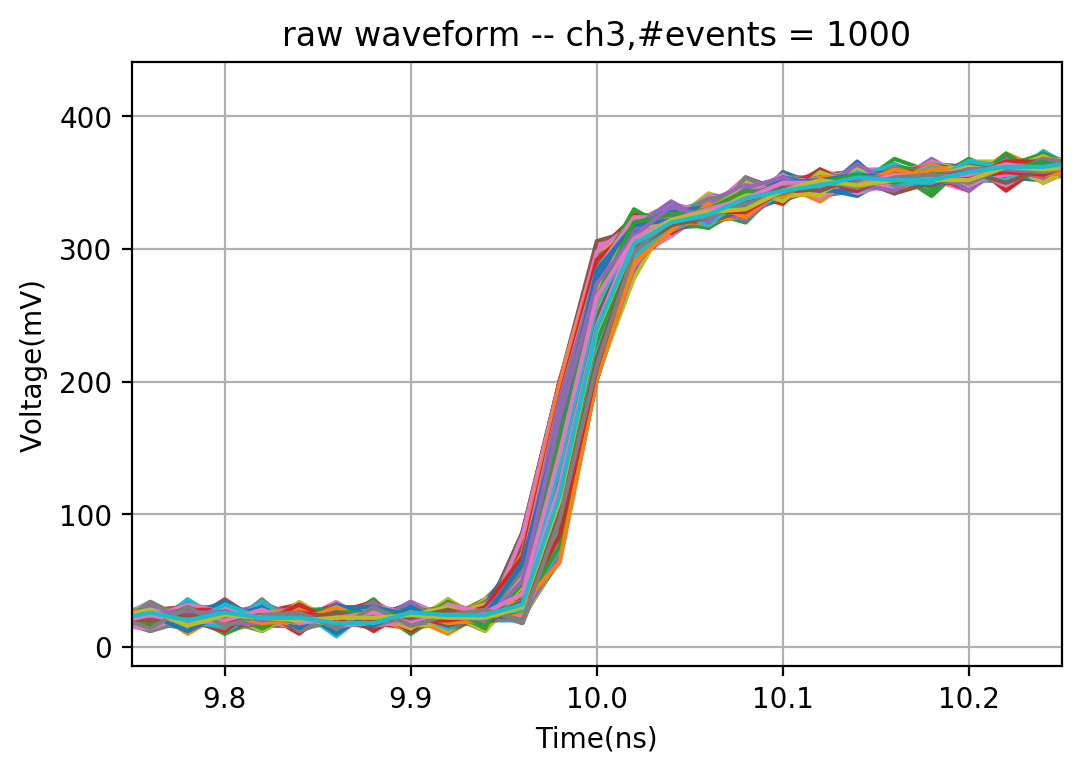

In [2]:
########## ETROC0 batch1 board1 ######################
textstr = '\n'.join((
    '-- ETROC0 batch1 board1',
    '-- baseline = DAC207',
    '-- low power, default gain'))
path ="../../../CMS ETL ASIC/ETROC0/test results/FNAL_Test/202006_ETROC0/"
file_in = 'Discriminator_LGDP/4fC/LGDP_DAC220_4fC_0.hdf5'
# file_in = 'DGDP/30fC/DGDP_DAC216_30fC_0.hdf5'
# file_in = 'DGDP/4fC/DGDP_DAC228_4fC_0.hdf5'


tdc_bin = 10e-3


################## check waveform  #######################

file = path + file_in

data, attrs = etroc0_benchtest.extract_dataset(file)
events_t = attrs['readout_size']
npoints = attrs['nPt']
x = np.arange(npoints)
dt = attrs['dt']

filelist = []
filelist_to_use = [file_in]
for apath in filelist_to_use:
    if apath.find(".hdf5") > -1:
        filelist.append(os.path.join(path,apath))
y_ch1 = []
y_ch2 = []
y_ch3 = []
y_ch4 = []
for item in tqdm(filelist):
    data, attrs = etroc0_benchtest.extract_dataset(item)
    for event in range(len(data[0])):
        y_ch1.append(data[0][event])
    for event in range(len(data[1])):
        y_ch2.append(data[1][event])
    for event in range(len(data[2])):
        y_ch3.append(data[2][event])
    for event in range(len(data[3])):
        y_ch4.append(data[3][event])

events_ch1 = len(y_ch1)
events_ch2 = len(y_ch2)
events_ch3 = len(y_ch3)
events_ch4 = len(y_ch4)
events_t = events_ch1
time = x*dt*1e9




# plt.plot(y_ch1[2109])
print('npoints is',npoints)
print('events_t is',events_t)

# events_t = events_t - 2500
# events_t = events_t - 590


######### Plot signal with points ch1  ###########
fig, ax1 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax1.plot(time, y_ch1[ab]*1000)
# ax1.set_xlim(left=15,right=25)
ax1.grid()
ax1.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch1, #events = %d'%(events_t))
# pp.savefig(fig)
plt.show()


######### Plot signal with points ch2  ###########
fig, ax2 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax2.plot(time, y_ch2[ab]*1000)
ax2.set_xlim(left=15,right=35)
ax2.grid()
ax2.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch2,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

######### Plot signal with points ch3  ###########
fig, ax3 = plt.subplots(dpi=200)
for ab in range(0,events_t):
    ax3.plot(time, y_ch3[ab]*1000)
ax3.set_xlim(left=9.75,right=10.25)
ax3.grid()
ax3.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
       title='raw waveform -- ch3,#events = %d'%(events_t))
# pp.savefig(fig)
plt.show()

# ######### Plot signal with points ch4  ###########
# fig, ax4 = plt.subplots(dpi=200)
# for ab in range(0,events_t):
#     ax4.plot(time, y_ch4[ab]*1000)
# # ax2.set_xlim(left=60,right=80)
# ax4.grid()
# ax4.set(xlabel='Time(ns)', ylabel='Voltage(mV)',
#        title='raw waveform -- ch4,#events = %d'%(events_t))
# # pp.savefig(fig)
# plt.show()

# plt.close(fig)



In [3]:
########################################## DAC 211 #################################
filelist = [
    'Discriminator_LGDP/4fC/LGDP_DAC211_4fC_0.hdf5',
    'Discriminator_LGDP/5fC/LGDP_DAC211_5fC_0.hdf5',
    'Discriminator_LGDP/6fC/LGDP_DAC211_6fC_0.hdf5',
    'Discriminator_LGDP/8fC/LGDP_DAC211_8fC_0.hdf5',
    'Discriminator_LGDP/10fC/LGDP_DAC211_10fC_0.hdf5',
    'Discriminator_LGDP/12fC/LGDP_DAC211_12fC_0.hdf5',
    'Discriminator_LGDP/15fC/LGDP_DAC211_15fC_0.hdf5',
    'Discriminator_LGDP/20fC/LGDP_DAC211_20fC_0.hdf5',
    'Discriminator_LGDP/30fC/LGDP_DAC211_30fC_0.hdf5'
]

charge_DAC211_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]



file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC211_list = []
mean_t_trigger_DAC211_list = []
std_t_trigger_DAC211_list = []
t_pa_DAC211_list = []
mean_t_pa_DAC211_list = []
std_t_pa_DAC211_list = []
t_discri_le_DAC211_list = []
mean_t_discri_le_DAC211_list = []
std_t_discri_le_DAC211_list = []
t_discri_te_DAC211_list = []
mean_t_discri_te_DAC211_list = []
std_t_discri_te_DAC211_list = []
t_discri_le_notrig_DAC211_list = []
mean_t_discri_le_notrig_DAC211_list = []
std_t_discri_le_notrig_DAC211_list = []
t_discri_te_notrig_DAC211_list = []
mean_t_discri_te_notrig_DAC211_list = []
std_t_discri_te_notrig_DAC211_list = []
ampl_ch1_DAC211_list = []
mean_ampl_DAC211_list = []
std_ampl_DAC211_list = []
q_ch1_DAC211_list = []
mean_q_DAC211_list = []
std_q_DAC211_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=5, tdc_start_pa=15, tdc_le_start=15, tdc_te_start=35)
    
    t_trigger_DAC211_list.append(t_trigger)
    mean_t_trigger_DAC211_list.append(mean_t_trigger)
    std_t_trigger_DAC211_list.append(std_t_trigger*1000)
    t_pa_DAC211_list.append(t_pa)
    mean_t_pa_DAC211_list.append(mean_t_pa)
    std_t_pa_DAC211_list.append(std_t_pa*1000)
    t_discri_le_DAC211_list.append(t_discri_le)
    mean_t_discri_le_DAC211_list.append(mean_t_discri_le)
    std_t_discri_le_DAC211_list.append(std_t_discri_le*1000)
    t_discri_te_DAC211_list.append(t_discri_te)
    mean_t_discri_te_DAC211_list.append(mean_t_discri_te)
    std_t_discri_te_DAC211_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC211_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC211_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC211_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC211_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC211_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC211_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC211_list.append(ampl_ch1)
    mean_ampl_DAC211_list.append(mean_ampl)
    std_ampl_DAC211_list.append(std_ampl)
    q_ch1_DAC211_list.append(q_ch1)
    mean_q_DAC211_list.append(mean_q)
    std_q_DAC211_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC211_list is\n',std_t_pa_DAC211_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC211_list is\n',std_t_discri_le_notrig_DAC211_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC211_list is\n', std_t_discri_te_notrig_DAC211_list)
print('*****************************************************************************************')
print('mean_ampl_DAC211_list is\n', mean_ampl_DAC211_list)
print('*****************************************************************************************')
print('mean_q_DAC211_list is\n', mean_q_DAC211_list)

file_num is 9



npoints at DAC211 / LGDP/4fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.201
trigger crossing searching is done
trigger mean is 9.995360000000003 ns
trigger std is 0.0049870231601626775 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.287080000000007 ns
PA std is 0.035766934450691186 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.729750000000006 ns
discriminator leading std is 0.03462423284348701 ns
discriminator trailing mean is 24.479770000000055 ns
discriminator trailing std is 0.14375759840787553 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.734390000000001 ns
discriminator t_le std (trigger removed) is 0.034316583454650676 ns
discriminator t_te mean (t


npoints at DAC211 / LGDP/5fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.24839999999999998
trigger crossing searching is done
trigger mean is 9.994410000000004 ns
trigger std is 0.005315251640326994 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.167610000000003 ns
PA std is 0.033280443206183265 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.639380000000006 ns
discriminator leading std is 0.02822437953259568 ns
discriminator trailing mean is 24.75775000000005 ns
discriminator trailing std is 0.12226462080258553 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.644970000000002 ns
discriminator t_le std (trigger removed) is 0.028057068628066003 ns
discriminator 


npoints at DAC211 / LGDP/6fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.30560000000000004
trigger crossing searching is done
trigger mean is 9.995770000000004 ns
trigger std is 0.005311035680542807 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.092540000000003 ns
PA std is 0.02054625026616783 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.573840000000004 ns
discriminator leading std is 0.02579640285001008 ns
discriminator trailing mean is 24.964120000000054 ns
discriminator trailing std is 0.11358268177851773 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.578070000000004 ns
discriminator t_le std (trigger removed) is 0.02551813276868054 ns
discriminator t


npoints at DAC211 / LGDP/8fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.41000000000000003
trigger crossing searching is done
trigger mean is 9.995760000000004 ns
trigger std is 0.005424241882512131 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.035710000000005 ns
PA std is 0.013568194426672633 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.500300000000003 ns
discriminator leading std is 0.020632740971571927 ns
discriminator trailing mean is 25.232350000000057 ns
discriminator trailing std is 0.09445727870312601 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.504540000000002 ns
discriminator t_le std (trigger removed) is 0.019697421151003102 ns
discriminato


npoints at DAC211 / LGDP/10fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.5075
trigger crossing searching is done
trigger mean is 9.995310000000005 ns
trigger std is 0.005225313387730811 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.998140000000006 ns
PA std is 0.011930649605113476 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.446010000000005 ns
discriminator leading std is 0.019620904668236887 ns
discriminator trailing mean is 25.411670000000058 ns
discriminator trailing std is 0.08990056228967652 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.450700000000001 ns
discriminator t_le std (trigger removed) is 0.018955474143371807 ns
discriminator t_te mean 


npoints at DAC211 / LGDP/12fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.615
trigger crossing searching is done
trigger mean is 9.995860000000004 ns
trigger std is 0.005519094128568446 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.97886000000001 ns
PA std is 0.011528243578273641 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.413350000000005 ns
discriminator leading std is 0.018018809616619863 ns
discriminator trailing mean is 25.525290000000055 ns
discriminator trailing std is 0.08256824995117681 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.417489999999999 ns
discriminator t_le std (trigger removed) is 0.017140592171800632 ns
discriminator t_te mean (t


npoints at DAC211 / LGDP/15fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.756
trigger crossing searching is done
trigger mean is 9.995460000000005 ns
trigger std is 0.005365482270961183 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.957980000000003 ns
PA std is 0.011292457659872827 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.378880000000006 ns
discriminator leading std is 0.016399560969732982 ns
discriminator trailing mean is 25.653910000000053 ns
discriminator trailing std is 0.08160521980853927 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.383420000000003 ns
discriminator t_le std (trigger removed) is 0.015508178487494605 ns
discriminator t_te mean (


npoints at DAC211 / LGDP/20fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.95
trigger crossing searching is done
trigger mean is 9.993060000000003 ns
trigger std is 0.006390336454365941 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.928990000000006 ns
PA std is 0.011656753407359747 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.33996000000001 ns
discriminator leading std is 0.014505116338726542 ns
discriminator trailing mean is 25.746660000000055 ns
discriminator trailing std is 0.07716504649127107 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.346900000000002 ns
discriminator t_le std (trigger removed) is 0.013790939054320852 ns
discriminator t_te mean (tr


npoints at DAC211 / LGDP/30fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.432
trigger crossing searching is done
trigger mean is 9.995500000000003 ns
trigger std is 0.005527205442174074 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.208340000000003 ns
PA std is 0.012475752482315068 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.592560000000006 ns
discriminator leading std is 0.015206787958014696 ns
discriminator trailing mean is 26.216100000000054 ns
discriminator trailing std is 0.06862208099438562 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.59706 ns
discriminator t_le std (trigger removed) is 0.0140696979356352 ns
discriminator t_te mean (trigger remo

In [4]:
########################################## DAC 215 #################################
filelist = [
    'Discriminator_LGDP/4fC/LGDP_DAC215_4fC_0.hdf5',
    'Discriminator_LGDP/5fC/LGDP_DAC215_5fC_0.hdf5',
    'Discriminator_LGDP/6fC/LGDP_DAC215_6fC_0.hdf5',
    'Discriminator_LGDP/8fC/LGDP_DAC215_8fC_0.hdf5',
    'Discriminator_LGDP/10fC/LGDP_DAC215_10fC_0.hdf5',
    'Discriminator_LGDP/12fC/LGDP_DAC215_12fC_0.hdf5',
    'Discriminator_LGDP/15fC/LGDP_DAC215_15fC_0.hdf5',
    'Discriminator_LGDP/20fC/LGDP_DAC215_20fC_0.hdf5',
    'Discriminator_LGDP/30fC/LGDP_DAC215_30fC_0.hdf5'
]

charge_DAC215_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]


file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC215_list = []
mean_t_trigger_DAC215_list = []
std_t_trigger_DAC215_list = []
t_pa_DAC215_list = []
mean_t_pa_DAC215_list = []
std_t_pa_DAC215_list = []
t_discri_le_DAC215_list = []
mean_t_discri_le_DAC215_list = []
std_t_discri_le_DAC215_list = []
t_discri_te_DAC215_list = []
mean_t_discri_te_DAC215_list = []
std_t_discri_te_DAC215_list = []
t_discri_le_notrig_DAC215_list = []
mean_t_discri_le_notrig_DAC215_list = []
std_t_discri_le_notrig_DAC215_list = []
t_discri_te_notrig_DAC215_list = []
mean_t_discri_te_notrig_DAC215_list = []
std_t_discri_te_notrig_DAC215_list = []
ampl_ch1_DAC215_list = []
mean_ampl_DAC215_list = []
std_ampl_DAC215_list = []
q_ch1_DAC215_list = []
mean_q_DAC215_list = []
std_q_DAC215_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=5, tdc_start_pa=15, tdc_le_start=15, tdc_te_start=35)
    
    t_trigger_DAC215_list.append(t_trigger)
    mean_t_trigger_DAC215_list.append(mean_t_trigger)
    std_t_trigger_DAC215_list.append(std_t_trigger*1000)
    t_pa_DAC215_list.append(t_pa)
    mean_t_pa_DAC215_list.append(mean_t_pa)
    std_t_pa_DAC215_list.append(std_t_pa*1000)
    t_discri_le_DAC215_list.append(t_discri_le)
    mean_t_discri_le_DAC215_list.append(mean_t_discri_le)
    std_t_discri_le_DAC215_list.append(std_t_discri_le*1000)
    t_discri_te_DAC215_list.append(t_discri_te)
    mean_t_discri_te_DAC215_list.append(mean_t_discri_te)
    std_t_discri_te_DAC215_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC215_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC215_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC215_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC215_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC215_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC215_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC215_list.append(ampl_ch1)
    mean_ampl_DAC215_list.append(mean_ampl)
    std_ampl_DAC215_list.append(std_ampl)
    q_ch1_DAC215_list.append(q_ch1)
    mean_q_DAC215_list.append(mean_q)
    std_q_DAC215_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC215_list is\n',std_t_pa_DAC215_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC215_list is\n',std_t_discri_le_notrig_DAC215_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC215_list is\n', std_t_discri_te_notrig_DAC215_list)
print('*****************************************************************************************')
print('mean_ampl_DAC215_list is\n', mean_ampl_DAC215_list)
print('*****************************************************************************************')
print('mean_q_DAC215_list is\n', mean_q_DAC215_list)

file_num is 9



npoints at DAC215 / LGDP/4fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.201
trigger crossing searching is done
trigger mean is 9.995380000000003 ns
trigger std is 0.0049855390882028935 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.28849000000001 ns
PA std is 0.0351172308133776 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.878610000000005 ns
discriminator leading std is 0.03470112246023164 ns
discriminator trailing mean is 23.811890000000055 ns
discriminator trailing std is 0.11468970267639557 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.883230000000003 ns
discriminator t_le std (trigger removed) is 0.03405975777952617 ns
discriminator t_te mean (trigg


npoints at DAC215 / LGDP/5fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.24839999999999995
trigger crossing searching is done
trigger mean is 9.994910000000003 ns
trigger std is 0.005309604505045438 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.164010000000005 ns
PA std is 0.03343381372203897 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.757660000000005 ns
discriminator leading std is 0.026823951983256347 ns
discriminator trailing mean is 24.203050000000054 ns
discriminator trailing std is 0.09933074800886194 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.76275 ns
discriminator t_le std (trigger removed) is 0.026323706046072627 ns
discriminator t_te mean


npoints at DAC215 / LGDP/6fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.3088
trigger crossing searching is done
trigger mean is 9.995630000000004 ns
trigger std is 0.005709912433654181 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.091310000000004 ns
PA std is 0.02084187851418391 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.670880000000004 ns
discriminator leading std is 0.023290032202639355 ns
discriminator trailing mean is 24.473980000000054 ns
discriminator trailing std is 0.08722591128787364 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.675250000000004 ns
discriminator t_le std (trigger removed) is 0.022648123542580275 ns
discriminator t_te mean (t


npoints at DAC215 / LGDP/8fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.41200000000000003
trigger crossing searching is done
trigger mean is 9.995620000000002 ns
trigger std is 0.00544202168316139 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.034810000000004 ns
PA std is 0.01351901993489136 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.580280000000005 ns
discriminator leading std is 0.018743574899148966 ns
discriminator trailing mean is 24.807120000000054 ns
discriminator trailing std is 0.08061951128604046 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.584660000000001 ns
discriminator t_le std (trigger removed) is 0.018124138600220604 ns
discriminator 


npoints at DAC215 / LGDP/10fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.515
trigger crossing searching is done
trigger mean is 9.995890000000003 ns
trigger std is 0.005496171394707293 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.997410000000002 ns
PA std is 0.011532211409785765 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.520150000000008 ns
discriminator leading std is 0.016506892499801022 ns
discriminator trailing mean is 25.01796000000006 ns
discriminator trailing std is 0.07486680439286836 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.524260000000002 ns
discriminator t_le std (trigger removed) is 0.01615092567006572 ns
discriminator t_te mean (tr


npoints at DAC215 / LGDP/12fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.609
trigger crossing searching is done
trigger mean is 9.995460000000005 ns
trigger std is 0.005214249706333485 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.977790000000006 ns
PA std is 0.012296987435954022 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.47685000000001 ns
discriminator leading std is 0.015125392556889094 ns
discriminator trailing mean is 25.17940000000005 ns
discriminator trailing std is 0.0670376013890711 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.481390000000003 ns
discriminator t_le std (trigger removed) is 0.01433066292953665 ns
discriminator t_te mean (trig


npoints at DAC215 / LGDP/15fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.764
trigger crossing searching is done
trigger mean is 9.996040000000004 ns
trigger std is 0.005702490683902835 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.957590000000003 ns
PA std is 0.01127350433538832 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.437120000000004 ns
discriminator leading std is 0.013707866354762305 ns
discriminator trailing mean is 25.329330000000056 ns
discriminator trailing std is 0.06100205816199971 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.441080000000001 ns
discriminator t_le std (trigger removed) is 0.012650438727570658 ns
discriminator t_te mean (t


npoints at DAC215 / LGDP/20fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.9299999999999999
trigger crossing searching is done
trigger mean is 9.992430000000004 ns
trigger std is 0.007028164767561864 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.929450000000006 ns
PA std is 0.01090859752672149 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.393340000000002 ns
discriminator leading std is 0.012666664912280311 ns
discriminator trailing mean is 25.449930000000055 ns
discriminator trailing std is 0.054581087383818186 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.40091 ns
discriminator t_le std (trigger removed) is 0.011622043710122335 ns
discriminator t_te mea


npoints at DAC215 / LGDP/30fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.432
trigger crossing searching is done
trigger mean is 9.996000000000004 ns
trigger std is 0.005513619500835972 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.209340000000005 ns
PA std is 0.012073292839983304 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.642030000000002 ns
discriminator leading std is 0.01147079334658218 ns
discriminator trailing mean is 25.954090000000054 ns
discriminator trailing std is 0.049235880209456725 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.646030000000003 ns
discriminator t_le std (trigger removed) is 0.010456533842530964 ns
discriminator t_te mean (

In [5]:
########################################## DAC 220 #################################
filelist = [
    'Discriminator_LGDP/4fC/LGDP_DAC220_4fC_0.hdf5',
    'Discriminator_LGDP/5fC/LGDP_DAC220_5fC_0.hdf5',
    'Discriminator_LGDP/6fC/LGDP_DAC220_6fC_0.hdf5',
    'Discriminator_LGDP/8fC/LGDP_DAC220_8fC_0.hdf5',
    'Discriminator_LGDP/10fC/LGDP_DAC220_10fC_0.hdf5',
    'Discriminator_LGDP/12fC/LGDP_DAC220_12fC_0.hdf5',
    'Discriminator_LGDP/15fC/LGDP_DAC220_15fC_0.hdf5',
    'Discriminator_LGDP/20fC/LGDP_DAC220_20fC_0.hdf5',
    'Discriminator_LGDP/30fC/LGDP_DAC220_30fC_0.hdf5'
]

charge_DAC220_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]



file_num = len(filelist)

print('file_num is', file_num)


t_trigger_DAC220_list = []
mean_t_trigger_DAC220_list = []
std_t_trigger_DAC220_list = []
t_pa_DAC220_list = []
mean_t_pa_DAC220_list = []
std_t_pa_DAC220_list = []
t_discri_le_DAC220_list = []
mean_t_discri_le_DAC220_list = []
std_t_discri_le_DAC220_list = []
t_discri_te_DAC220_list = []
mean_t_discri_te_DAC220_list = []
std_t_discri_te_DAC220_list = []
t_discri_le_notrig_DAC220_list = []
mean_t_discri_le_notrig_DAC220_list = []
std_t_discri_le_notrig_DAC220_list = []
t_discri_te_notrig_DAC220_list = []
mean_t_discri_te_notrig_DAC220_list = []
std_t_discri_te_notrig_DAC220_list = []
ampl_ch1_DAC220_list = []
mean_ampl_DAC220_list = []
std_ampl_DAC220_list = []
q_ch1_DAC220_list = []
mean_q_DAC220_list = []
std_q_DAC220_list = []

for item in tqdm(filelist):
    file_in = item
    charge_size = item.split('_')[2]
    DAC = item.split('_')[1]
    (t_trigger, mean_t_trigger, std_t_trigger, 
    t_pa, mean_t_pa, std_t_pa, 
    t_discri_le, mean_t_discri_le, std_t_discri_le, 
    t_discri_te, mean_t_discri_te, std_t_discri_te, 
    t_discri_le_notrig, mean_t_discri_le_notrig, std_t_discri_le_notrig, 
    t_discri_te_notrig, mean_t_discri_te_notrig, std_t_discri_te_notrig,
    ampl_ch1, mean_ampl, std_ampl,
    q_ch1, mean_q, std_q) = etroc0_benchtest.analyze_single_charge(
        hdf5_in=file_in, path=path, charge_size=charge_size, DAC=DAC, tdc_bin=tdc_bin, transCond = 4.4e3, 
        tdc_start_trigger=5, tdc_start_pa=15, tdc_le_start=15, tdc_te_start=35)
    
    t_trigger_DAC220_list.append(t_trigger)
    mean_t_trigger_DAC220_list.append(mean_t_trigger)
    std_t_trigger_DAC220_list.append(std_t_trigger*1000)
    t_pa_DAC220_list.append(t_pa)
    mean_t_pa_DAC220_list.append(mean_t_pa)
    std_t_pa_DAC220_list.append(std_t_pa*1000)
    t_discri_le_DAC220_list.append(t_discri_le)
    mean_t_discri_le_DAC220_list.append(mean_t_discri_le)
    std_t_discri_le_DAC220_list.append(std_t_discri_le*1000)
    t_discri_te_DAC220_list.append(t_discri_te)
    mean_t_discri_te_DAC220_list.append(mean_t_discri_te)
    std_t_discri_te_DAC220_list.append(std_t_discri_te*1000)
    t_discri_le_notrig_DAC220_list.append(t_discri_le_notrig)
    mean_t_discri_le_notrig_DAC220_list.append(mean_t_discri_le_notrig)
    std_t_discri_le_notrig_DAC220_list.append(std_t_discri_le_notrig*1000)
    t_discri_te_notrig_DAC220_list.append(t_discri_te_notrig)
    mean_t_discri_te_notrig_DAC220_list.append(mean_t_discri_te_notrig)
    std_t_discri_te_notrig_DAC220_list.append(std_t_discri_te_notrig*1000)
    ampl_ch1_DAC220_list.append(ampl_ch1)
    mean_ampl_DAC220_list.append(mean_ampl)
    std_ampl_DAC220_list.append(std_ampl)
    q_ch1_DAC220_list.append(q_ch1)
    mean_q_DAC220_list.append(mean_q)
    std_q_DAC220_list.append(std_q)

print('*****************************************************************************************')
print('*****************************************************************************************')
print('*****************************************************************************************')
print('std_t_pa_DAC220_list is\n',std_t_pa_DAC220_list)
print('*****************************************************************************************')
print('std_t_discri_le_notrig_DAC220_list is\n',std_t_discri_le_notrig_DAC220_list)
print('*****************************************************************************************')
print('std_t_discri_te_notrig_DAC220_list is\n', std_t_discri_te_notrig_DAC220_list)
print('*****************************************************************************************')
print('mean_ampl_DAC220_list is\n', mean_ampl_DAC220_list)
print('*****************************************************************************************')
print('mean_q_DAC220_list is\n', mean_q_DAC220_list)

file_num is 9



npoints at DAC220 / LGDP/4fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.201
trigger crossing searching is done
trigger mean is 9.995040000000005 ns
trigger std is 0.004999839997439812 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.285740000000004 ns
PA std is 0.03626640870006349 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 21.087200000000003 ns
discriminator leading std is 0.042567123464007324 ns
discriminator trailing mean is 23.255440000000053 ns
discriminator trailing std is 0.0789189863087458 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 11.092160000000003 ns
discriminator t_le std (trigger removed) is 0.042220071056312106 ns
discriminator t_te mean (tri


npoints at DAC220 / LGDP/5fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.25199999999999995
trigger crossing searching is done
trigger mean is 9.995300000000002 ns
trigger std is 0.004990991885387006 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.164390000000008 ns
PA std is 0.032830289368203765 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.904530000000005 ns
discriminator leading std is 0.02908571986387867 ns
discriminator trailing mean is 23.607190000000053 ns
discriminator trailing std is 0.0787096175826056 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.909230000000003 ns
discriminator t_le std (trigger removed) is 0.028752514672633855 ns
discriminator 


npoints at DAC220 / LGDP/6fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.30560000000000004
trigger crossing searching is done
trigger mean is 9.995470000000003 ns
trigger std is 0.005232504180600225 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.092760000000002 ns
PA std is 0.020658712447778543 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.792100000000005 ns
discriminator leading std is 0.02223038461205766 ns
discriminator trailing mean is 23.945120000000053 ns
discriminator trailing std is 0.07882883736298561 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.796630000000002 ns
discriminator t_le std (trigger removed) is 0.021934974356037203 ns
discriminator


npoints at DAC220 / LGDP/8fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.406
trigger crossing searching is done
trigger mean is 9.995250000000004 ns
trigger std is 0.005266640295292515 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.034760000000006 ns
PA std is 0.013679999999999677 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.671450000000007 ns
discriminator leading std is 0.01709378542043827 ns
discriminator trailing mean is 24.359210000000054 ns
discriminator trailing std is 0.06587773447835009 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.676200000000003 ns
discriminator t_le std (trigger removed) is 0.016575886099994448 ns
discriminator t_te mean (tr


npoints at DAC220 / LGDP/10fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.5075
trigger crossing searching is done
trigger mean is 9.995660000000003 ns
trigger std is 0.005325823879926823 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.997900000000005 ns
PA std is 0.011540797199500298 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.597860000000004 ns
discriminator leading std is 0.01473839882755346 ns
discriminator trailing mean is 24.612920000000056 ns
discriminator trailing std is 0.06058443364429526 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.6022 ns
discriminator t_le std (trigger removed) is 0.013941305534275677 ns
discriminator t_te mean (trigger rem


npoints at DAC220 / LGDP/12fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.612
trigger crossing searching is done
trigger mean is 9.995400000000005 ns
trigger std is 0.005332916650389239 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.978670000000005 ns
PA std is 0.012162692958387573 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.547400000000007 ns
discriminator leading std is 0.014122322755127472 ns
discriminator trailing mean is 24.807170000000053 ns
discriminator trailing std is 0.05877832168410385 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.552000000000001 ns
discriminator t_le std (trigger removed) is 0.012829653151975432 ns
discriminator t_te mean (


npoints at DAC220 / LGDP/15fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.756
trigger crossing searching is done
trigger mean is 9.995540000000004 ns
trigger std is 0.005301735564888049 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.957990000000002 ns
PA std is 0.011439401208106074 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.497140000000005 ns
discriminator leading std is 0.012442684597786493 ns
discriminator trailing mean is 25.006520000000055 ns
discriminator trailing std is 0.05102048216157881 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.501600000000002 ns
discriminator t_le std (trigger removed) is 0.011350770898929916 ns
discriminator t_te mean (


npoints at DAC220 / LGDP/20fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.93
trigger crossing searching is done
trigger mean is 9.992490000000004 ns
trigger std is 0.006760170116202555 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 19.929440000000007 ns
PA std is 0.011273260397950218 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.445580000000003 ns
discriminator leading std is 0.011604464658054222 ns
discriminator trailing mean is 25.163480000000053 ns
discriminator trailing std is 0.04559484181352069 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.453090000000001 ns
discriminator t_le std (trigger removed) is 0.010166213651110251 ns
discriminator t_te mean (t


npoints at DAC220 / LGDP/30fC/LGDP is 2000
events_t is 1000
threshold of trigger is 0.426
trigger crossing searching is done
trigger mean is 9.995740000000005 ns
trigger std is 0.00520119217103145 ns
**************************************************************************************
threshold of PA is -0.03
amp t crossing searching is done
PA mean is 20.209550000000004 ns
PA std is 0.012461841757942215 ns
**************************************************************************************
discriminator crossing searching is done
discriminator leading mean is 20.688600000000005 ns
discriminator leading std is 0.01008166652890265 ns
discriminator trailing mean is 25.700380000000056 ns
discriminator trailing std is 0.04098116152575519 ns
**************************************************************************************
discriminator t_le mean (trigger removed) is 10.692860000000001 ns
discriminator t_le std (trigger removed) is 0.008878085379179307 ns
discriminator t_te mean (tr

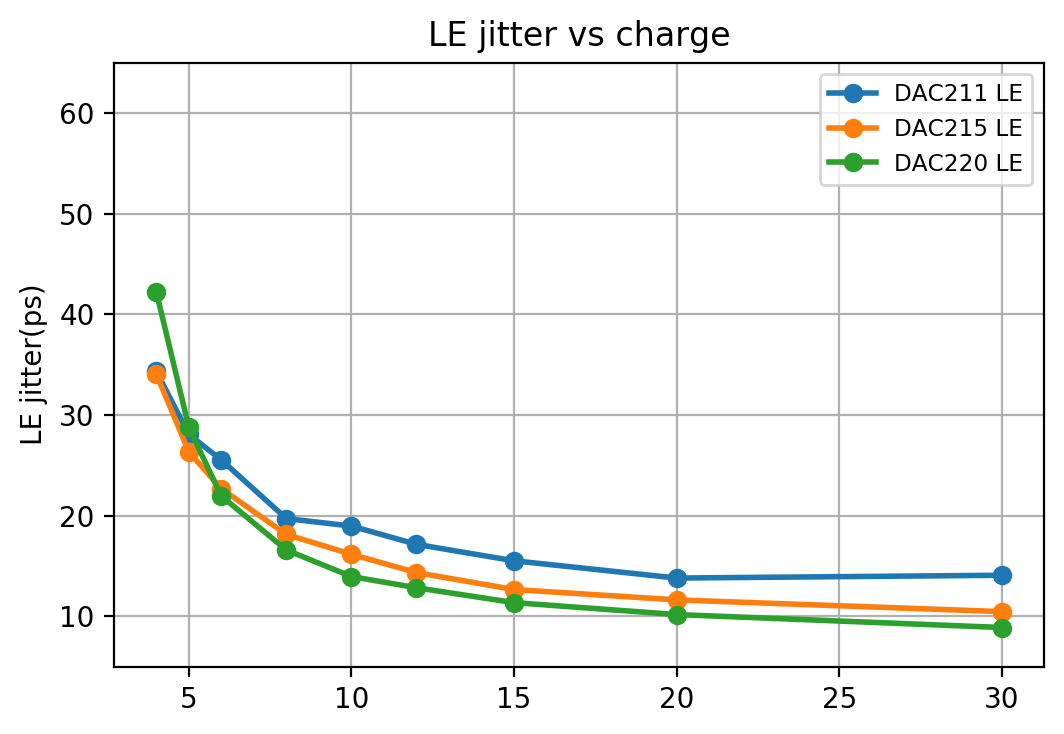

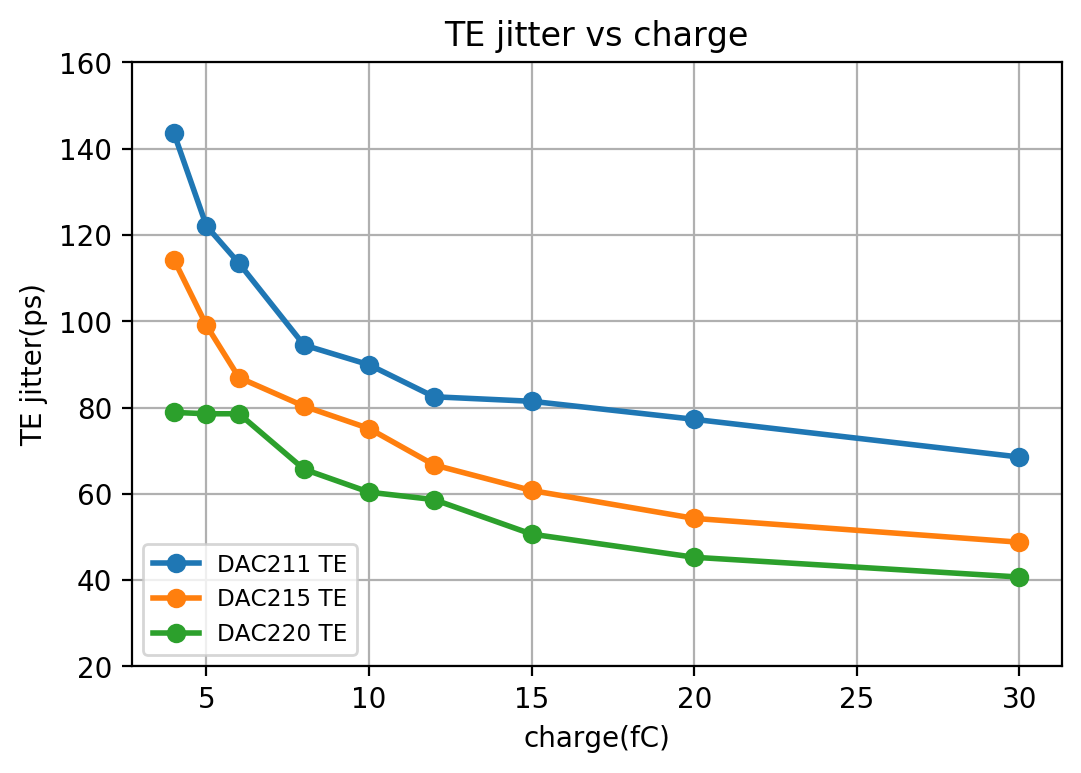

In [12]:
# ############## plot  ###############
# charge_DAC216_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC222_list = [4, 5, 6, 8, 10, 12, 15, 20, 30]
# charge_DAC228_list = [5, 6, 8, 10, 12, 15, 20, 30]
# std_t_discri_le_notrig_DAC216_list = [55.081312393576745, 33.5965400004161, 26.05374253345816, 
#                                       22.5273605866244, 18.81562582004275, 16.048937659543025, 
#                                       14.973709460247598, 12.898332256533537, 11.479982578381783, 11.415248573725846]
# std_t_discri_le_notrig_DAC222_list = [42.264784099759545, 28.33616770136146, 21.60300904966283, 
#                                       16.700071856129487, 13.96251768127515, 12.108030393087999, 
#                                       11.495519779459704, 9.761443284676796, 8.225442237349645]
# std_t_discri_le_notrig_DAC228_list = [39.770094292060314, 25.770479234964462, 17.58708617138944, 
#                                       12.937893955351925, 11.500642373361078, 9.781051835051402, 
#                                       8.127113571248723, 6.910352740633446]
# std_t_discri_te_notrig_DAC216_list = [136.65975623786466, 122.6894763212966, 103.3189768386996, 90.44033171100575, 
#                                       81.6119952886667, 77.18469391658961, 76.21657037677367, 74.75354439755857, 
#                                       86.70760851849761, 75.30381115851816]
# std_t_discri_te_notrig_DAC222_list = [93.108323473235, 92.4764801179013, 79.38929398853153, 69.01791361666994, 
#                                       62.30979838675822, 55.75950838196793, 53.888606402456176, 53.476577816824374, 
#                                       46.899221475405405]
# std_t_discri_te_notrig_DAC228_list = [72.6907146752451, 64.6289903990334, 57.5737361997525, 52.33364859245829, 
#                                       48.11770568095566, 41.1854947159715, 35.37269427113945, 32.352959292769185]

fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(charge_DAC211_list, std_t_discri_le_notrig_DAC211_list, 'o-', linewidth=2,  label="DAC211 LE")
ax1.plot(charge_DAC215_list, std_t_discri_le_notrig_DAC215_list, 'o-', linewidth=2,  label="DAC215 LE")
ax1.plot(charge_DAC220_list, std_t_discri_le_notrig_DAC220_list, 'o-', linewidth=2,  label="DAC220 LE")

ax1.set(ylabel='LE jitter(ps)',
       title='LE jitter vs charge')

ax1.set_ylim(bottom=5,top=65)
ax1.grid(which='both')
ax1.legend(loc = 'upper right', fontsize = 'small')
plt.show()

fig2,ax2 = plt.subplots(dpi=200)
ax2.plot(charge_DAC211_list, std_t_discri_te_notrig_DAC211_list, 'o-', linewidth=2,  label="DAC211 TE")
ax2.plot(charge_DAC215_list, std_t_discri_te_notrig_DAC215_list, 'o-', linewidth=2,  label="DAC215 TE")
ax2.plot(charge_DAC220_list, std_t_discri_te_notrig_DAC220_list, 'o-', linewidth=2,  label="DAC220 TE")
ax2.set_ylim(bottom=20,top=160)
ax2.set(xlabel='charge(fC)', ylabel='TE jitter(ps)',
       title='TE jitter vs charge')
ax2.grid(which='both')
ax2.legend(loc = 'lower left', fontsize = 'small')
plt.show()



In [7]:
plot_detail=False

if plot_detail==True:

    ############################### plot  ######################################
    # path_plot = './'
    # pp = PdfPages(path_plot+"plots_DGDP"+".pdf")
    
    
    # plot_details = False
    plot_details = True
    
    charge_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    q_ideal_list = [3, 4, 5, 6, 8, 10, 12, 15, 20, 30]
    
    # ######### plot text box #####
    # fig0, ax0 = plt.subplots(dpi=200)
    # props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # ax0.text(0.05, 0.95, textstr, transform=ax0.transAxes, fontsize=12,
    #         verticalalignment='top', bbox=props)
    # ax0.set_xlim(left=0,right=50)
    # ax0.set_ylim(bottom=0,top=50)
    # plt.show()
    # plt.close(fig0)
    
    ######### plot measured charge vs input charge  ######
    fig1, ax1 = plt.subplots(dpi=200)
    ax1.plot(charge_DAC216_list, mean_q_DAC216_list, 'o', label = 'DAC216 Charge')
    ax1.plot(charge_DAC216_list, q_ideal_list, 'o', label = 'input charge')
    # ax1.plot(charge_DAC222_list, mean_q_DAC222_list, 'o', label = 'DAC222 Charge')
    # ax1.plot(charge_DAC228_list, mean_q_DAC228_list, 'o', label = 'DAC228 Charge')
    ax1.set(xlabel='charge in(fC)', ylabel='charge measured(fC)',
           title='measured charge vs input charge')
    ax1.legend(loc = 'upper left', fontsize = 'small')
    ax1.grid(which='both')
    plt.show()
    plt.close(fig1)
    
    
    if plot_details == True:
        #### plot charge  ###########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_charge_gaus(q_ch1_DAC216_list[index], file_item='test file', 
                                                   num_bins= 30, range_default = None, xaxis = 'Charge (fC)',
                                                      ylable = 'Occurrence', title = str(charge_DAC216_list[index])+'fC', 
                                                           pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot trigger timing #############
        for index in range(0, len(charge_list)):
            etroc0_benchtest.plot_distribution_time(t_trigger_DAC216_list[index], file_item='test file', 
                                                    num_bins= 30, range_default = None, xaxis = 'Time Resolution(ns)',
                                                    ylable = 'Occurrence', title = 'Trigger Jitter at '+ str(charge_list[index]) + 'fC', 
                                                    pic = True, pdf = False)
    
    if plot_details == True:
        ###### plot discri timing #########
        for index in range(0, len(charge_DAC216_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC216_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC216_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC216_list[index]) + 'fC' + '/DAC216', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC222_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC222_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC222_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC222_list[index]) + 'fC' + '/DAC222', 
                                                    pic = True, pdf = False)
        for index in range(0, len(charge_DAC228_list)):
            etroc0_benchtest.plot_distribution_time(t_discri_le_notrig_DAC228_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri LE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            etroc0_benchtest.plot_distribution_time(t_discri_te_notrig_DAC228_list[index], file_item='test file', 
                                                    num_bins= 10, range_default = None, xaxis = 'Time Resolution(ns)', 
                                                    ylable = 'Occurrence', 
                                                    title = 'Discri TE jitter at '+ str(charge_DAC228_list[index]) + 'fC' + '/DAC228', 
                                                    pic = True, pdf = False)
            
    
    # pp.close()
else:
    print('plot_detail is disabled')

plot_detail is disabled


length of DAC211 list is 9
8000
3.116000000000048
5.8440000000000465


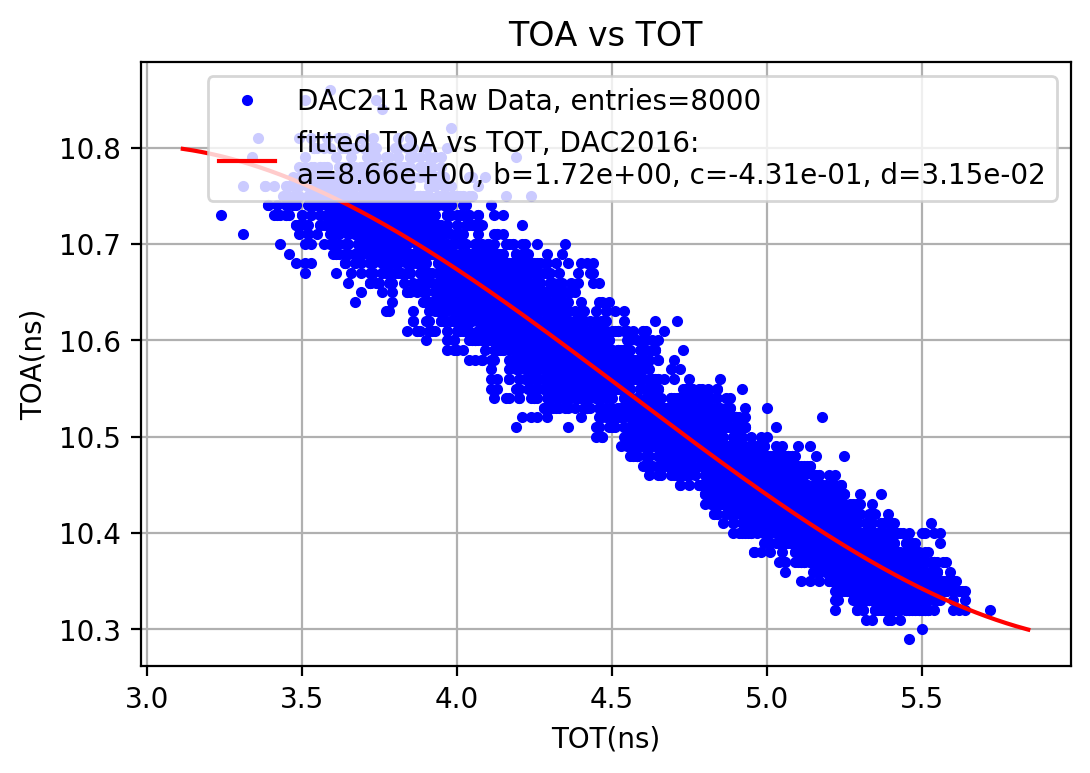

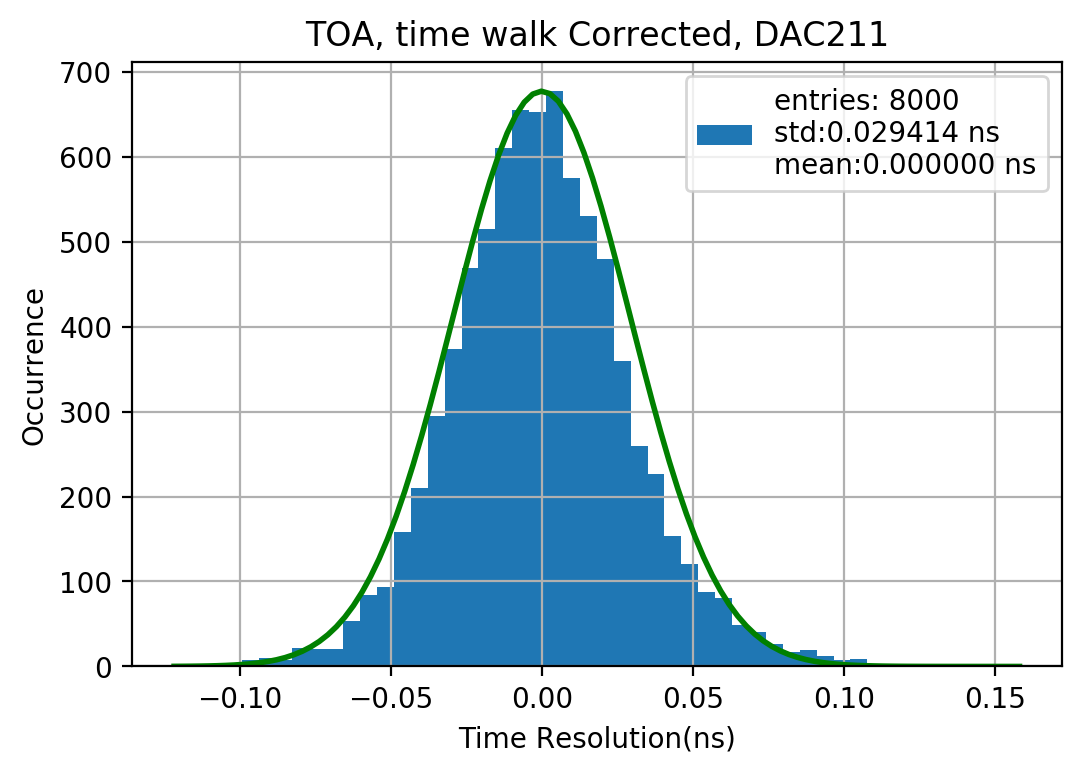

3.116000000000048
5.8440000000000465


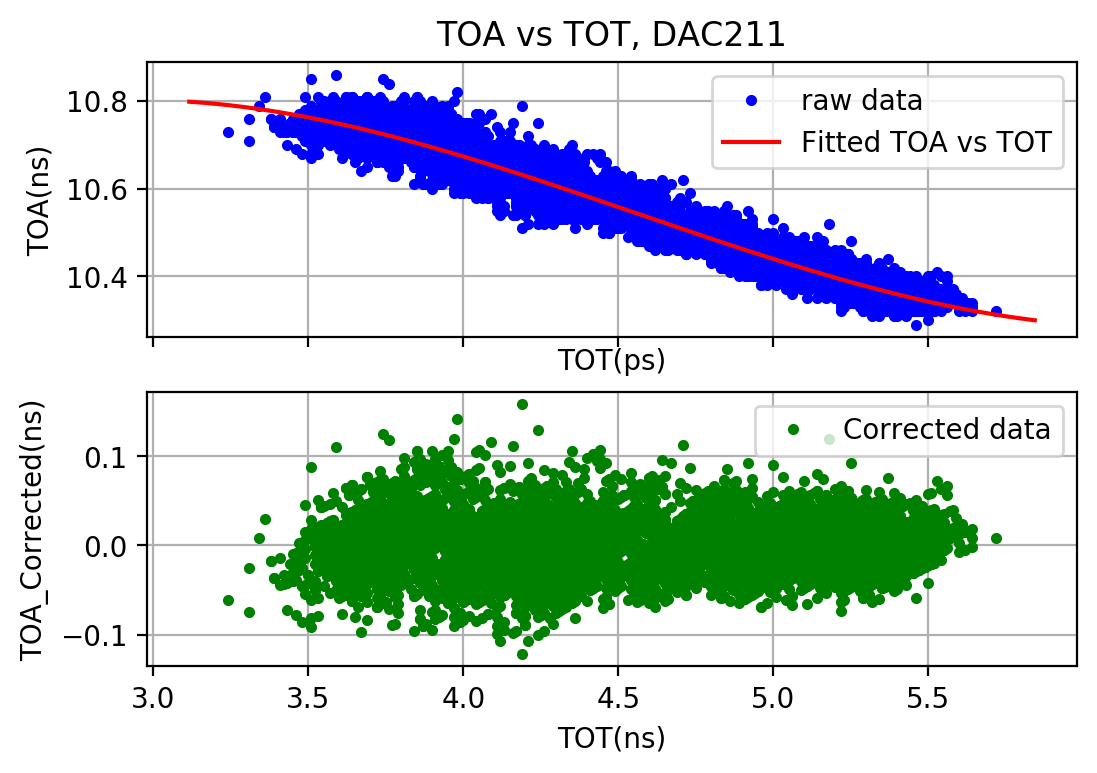

In [8]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC211 ##################

length_DAC211_le = len(t_discri_le_notrig_DAC211_list)
print('length of DAC211 list is', length_DAC211_le)

le_DAC211 = t_discri_le_notrig_DAC211_list[0] + t_discri_le_notrig_DAC211_list[1] + \
                t_discri_le_notrig_DAC211_list[2] + t_discri_le_notrig_DAC211_list[3] + \
                t_discri_le_notrig_DAC211_list[4] + t_discri_le_notrig_DAC211_list[5] + \
                t_discri_le_notrig_DAC211_list[6] + t_discri_le_notrig_DAC211_list[7] 
te_DAC211 = t_discri_te_notrig_DAC211_list[0] + t_discri_te_notrig_DAC211_list[1] + \
                t_discri_te_notrig_DAC211_list[2] + t_discri_te_notrig_DAC211_list[3] + \
                t_discri_te_notrig_DAC211_list[4] + t_discri_te_notrig_DAC211_list[5] + \
                t_discri_te_notrig_DAC211_list[6] + t_discri_te_notrig_DAC211_list[7] 
print(len(te_DAC211))

le_DAC211 = np.array(le_DAC211)
te_DAC211 = np.array(te_DAC211)

length_DAC211 = len(te_DAC211)

tot_DAC211 = te_DAC211 - le_DAC211

if polynomial_4th == True:
    popt_toa_DAC211, pcov_toa_DAC211 = curve_fit(etroc0_benchtest.func1, tot_DAC211, le_DAC211)
else:
    popt_toa_DAC211, pcov_toa_DAC211 = curve_fit(etroc0_benchtest.func0, tot_DAC211, le_DAC211)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC211, le_DAC211, 'b.', label='DAC211 Raw Data, entries=%d'%(length_DAC211))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC211), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC211))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC211), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC211))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC211_fitted=etroc0_benchtest.func1(tot_DAC211, *popt_toa_DAC211)
else:
    toa_DAC211_fitted=etroc0_benchtest.func0(tot_DAC211, *popt_toa_DAC211)

toa_DAC211_corrected = le_DAC211 - toa_DAC211_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC211_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC211', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC211_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC211', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC211_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC211', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC211, le_DAC211, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC211), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC211), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC211')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC211, toa_DAC211_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC211_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC215 list is 9
8000
2.4675000000000473
5.38250000000005


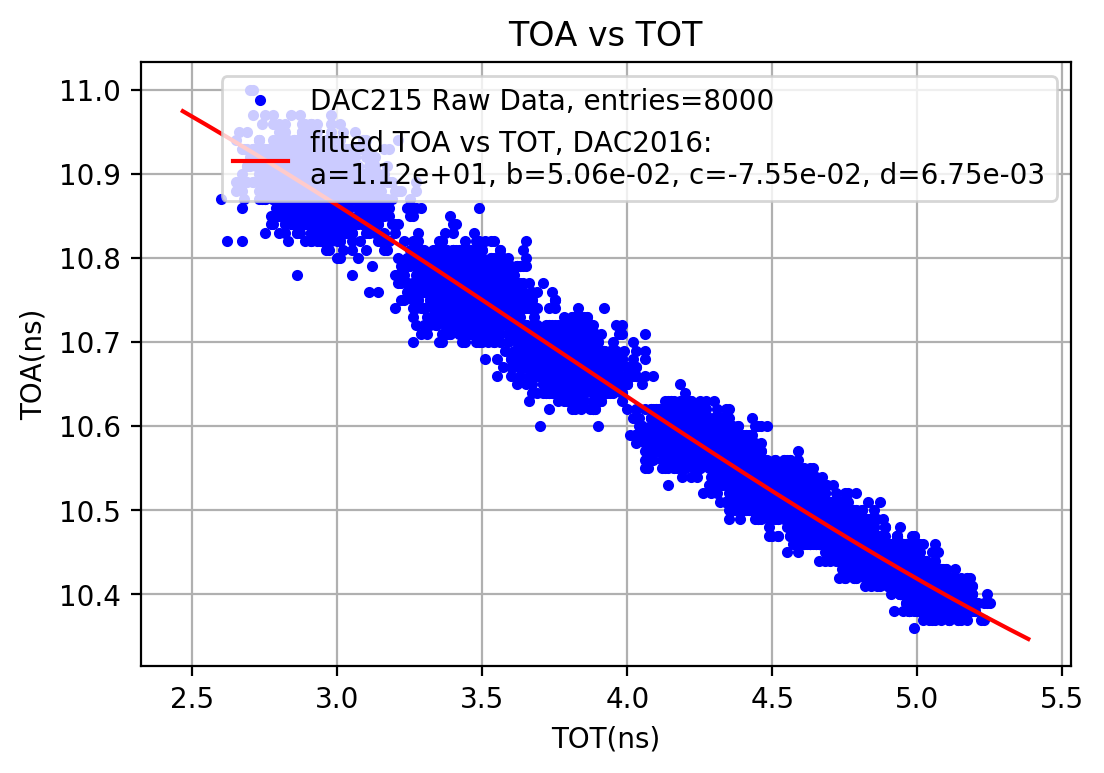

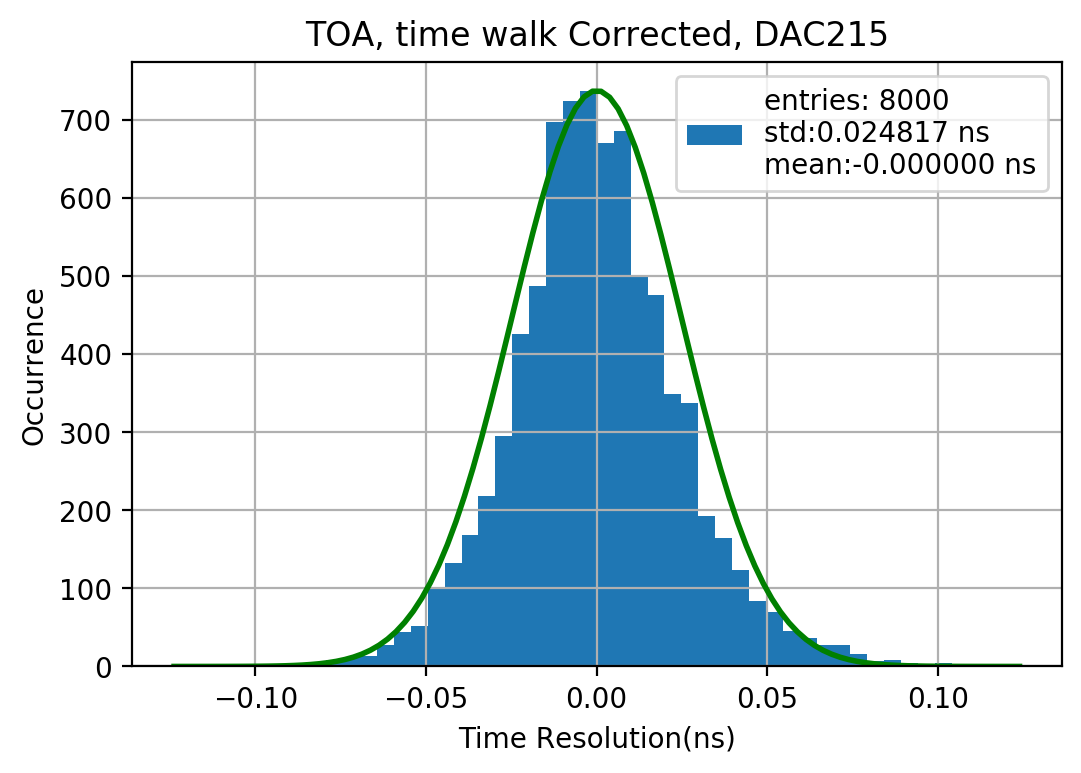

2.4675000000000473
5.38250000000005


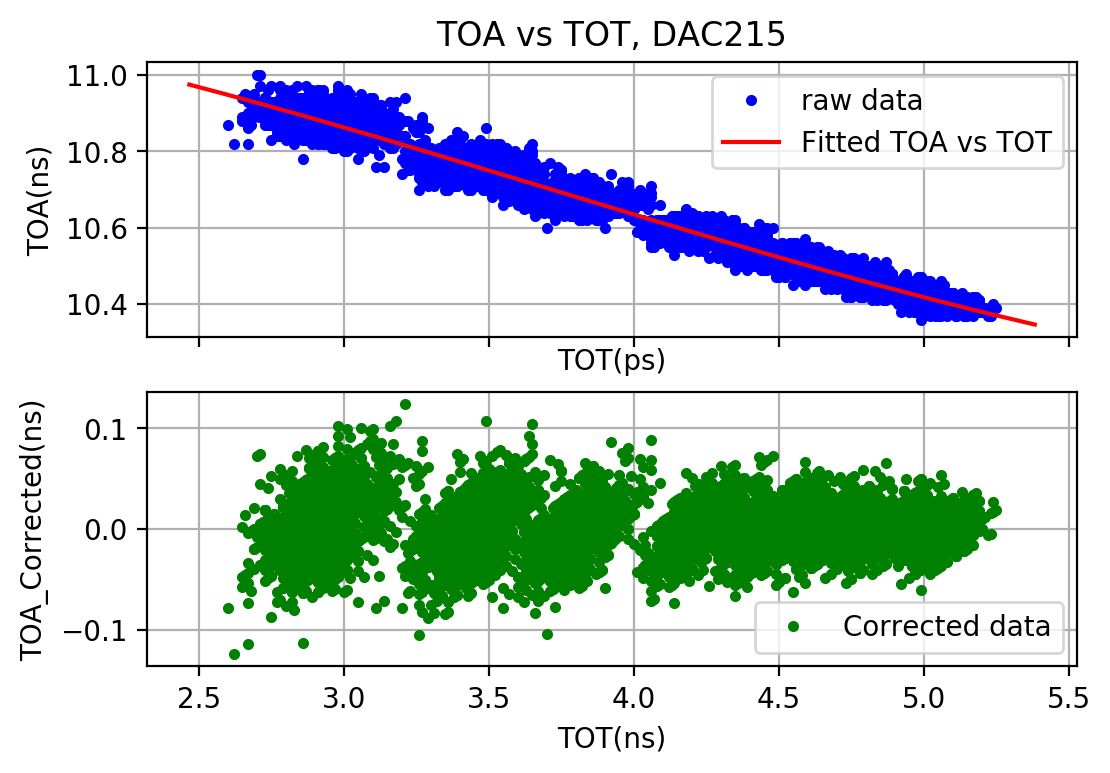

In [9]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC215 ##################

length_DAC215_le = len(t_discri_le_notrig_DAC215_list)
print('length of DAC215 list is', length_DAC215_le)

le_DAC215 = t_discri_le_notrig_DAC215_list[0] + t_discri_le_notrig_DAC215_list[1] + \
                t_discri_le_notrig_DAC215_list[2] + t_discri_le_notrig_DAC215_list[3] + \
                t_discri_le_notrig_DAC215_list[4] + t_discri_le_notrig_DAC215_list[5] + \
                t_discri_le_notrig_DAC215_list[6] + t_discri_le_notrig_DAC215_list[7]
te_DAC215 = t_discri_te_notrig_DAC215_list[0] + t_discri_te_notrig_DAC215_list[1] + \
                t_discri_te_notrig_DAC215_list[2] + t_discri_te_notrig_DAC215_list[3] + \
                t_discri_te_notrig_DAC215_list[4] + t_discri_te_notrig_DAC215_list[5] + \
                t_discri_te_notrig_DAC215_list[6] + t_discri_te_notrig_DAC215_list[7] 

print(len(te_DAC215))

le_DAC215 = np.array(le_DAC215)
te_DAC215 = np.array(te_DAC215)

length_DAC215 = len(te_DAC215)

tot_DAC215 = te_DAC215 - le_DAC215

if polynomial_4th == True:
    popt_toa_DAC215, pcov_toa_DAC215 = curve_fit(etroc0_benchtest.func1, tot_DAC215, le_DAC215)
else:
    popt_toa_DAC215, pcov_toa_DAC215 = curve_fit(etroc0_benchtest.func0, tot_DAC215, le_DAC215)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC215, le_DAC215, 'b.', label='DAC215 Raw Data, entries=%d'%(length_DAC215))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC215), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC215))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC215), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC215))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC215_fitted=etroc0_benchtest.func1(tot_DAC215, *popt_toa_DAC215)
else:
    toa_DAC215_fitted=etroc0_benchtest.func0(tot_DAC215, *popt_toa_DAC215)

toa_DAC215_corrected = le_DAC215 - toa_DAC215_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC215_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC215', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC215_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC215', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC215_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC215', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC215, le_DAC215, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC215), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC215), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC215')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC215, toa_DAC215_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC215_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()

length of DAC220 list is 9
8000
1.66750000000005
5.022500000000051


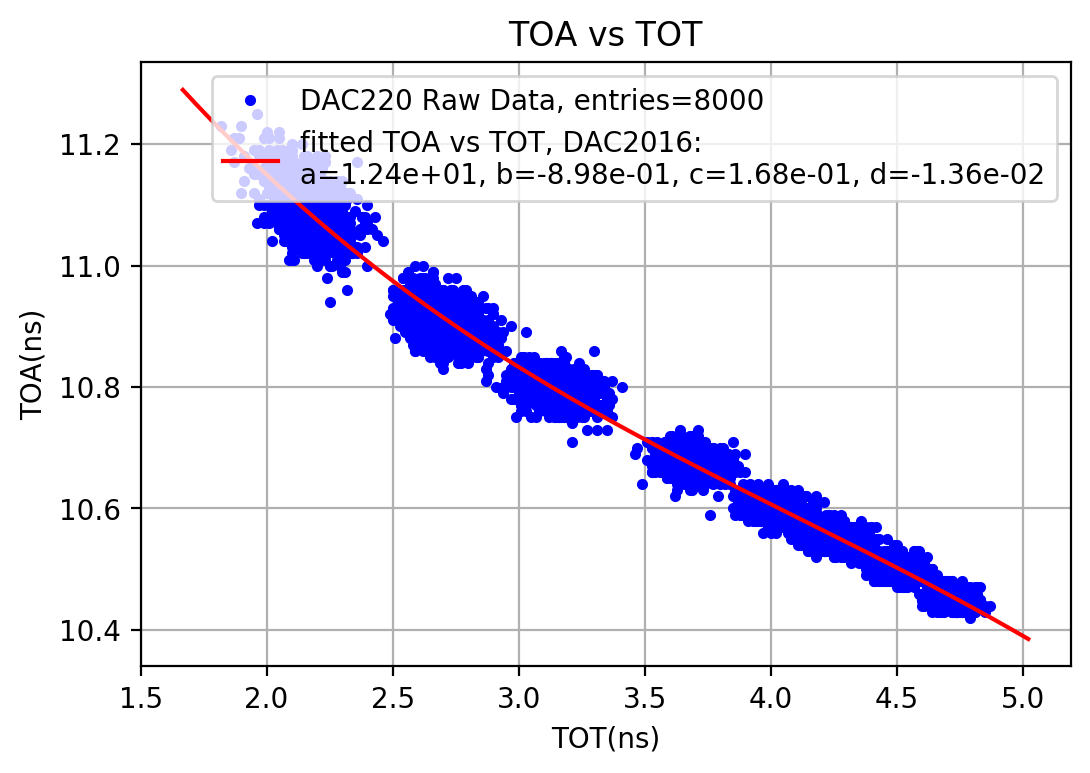

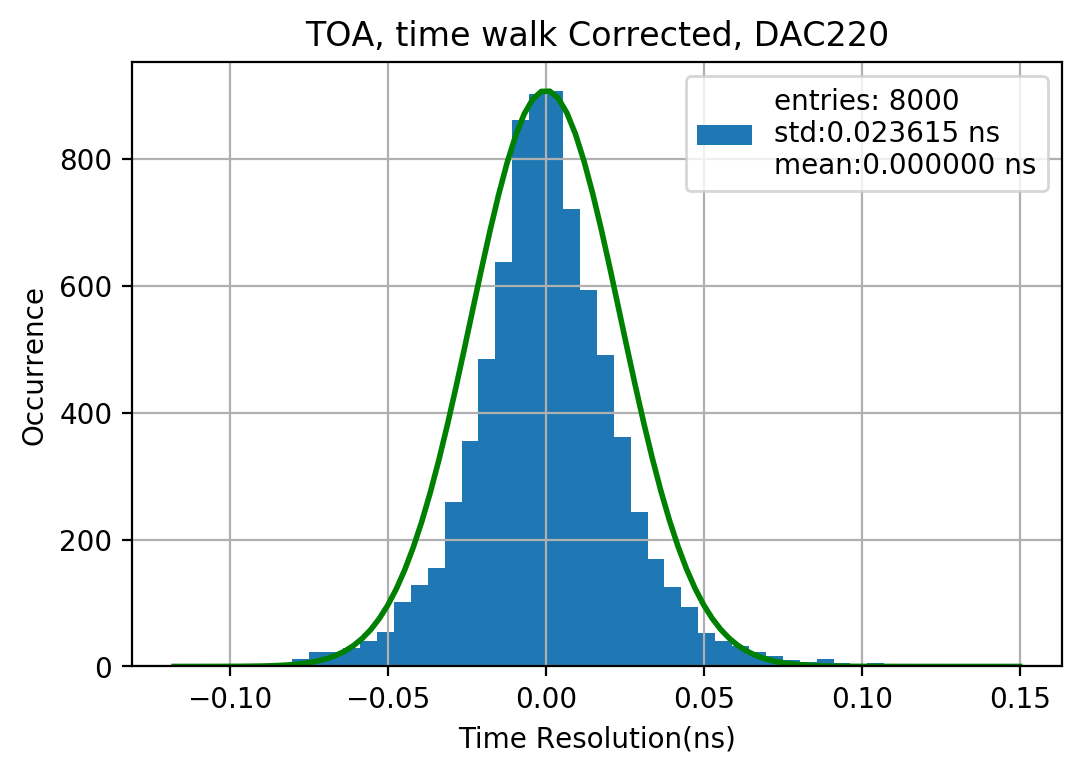

1.66750000000005
5.022500000000051


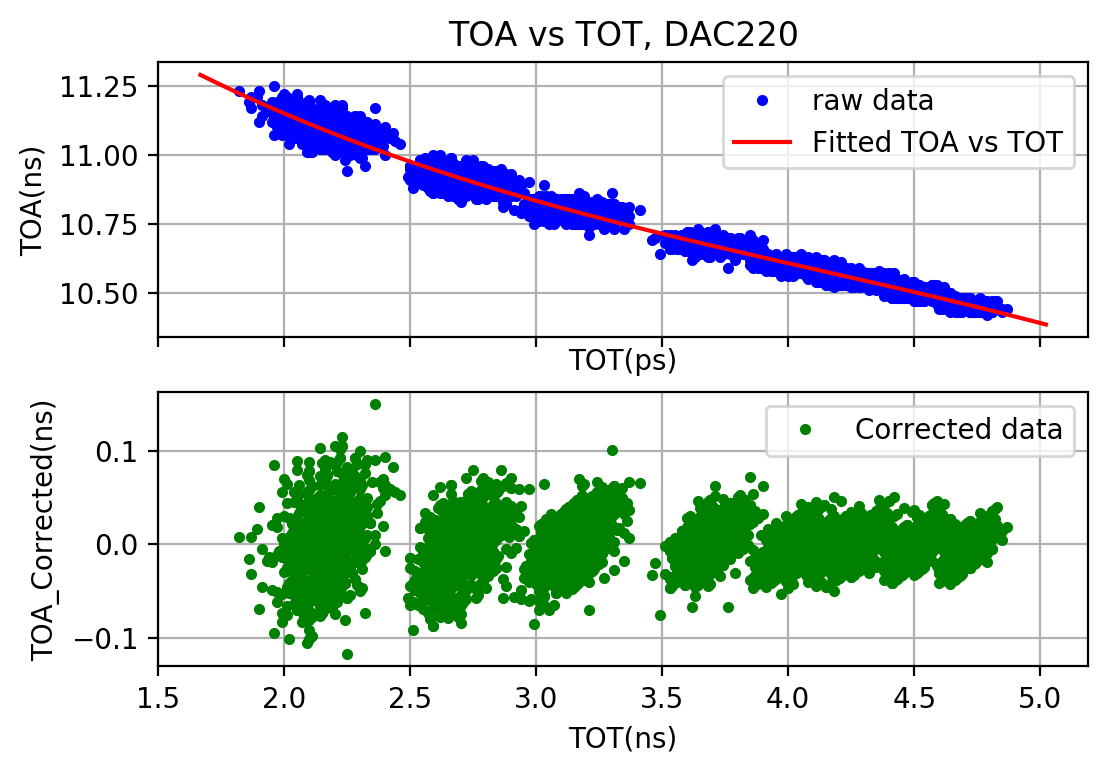

In [10]:
polynomial_4th = True
# polynomial_4th = False

# LindseyFit = True
LindseyFit = False
# SciFit = True       #scipy fitting with normal distribution
SciFit = False      #scipy unbiased standard deviation

############### Time Walk Calibration  DAC220 ##################

length_DAC220_le = len(t_discri_le_notrig_DAC220_list)
print('length of DAC220 list is', length_DAC220_le)

le_DAC220 = t_discri_le_notrig_DAC220_list[0] + t_discri_le_notrig_DAC220_list[1] + \
                t_discri_le_notrig_DAC220_list[2] + t_discri_le_notrig_DAC220_list[3] + \
                t_discri_le_notrig_DAC220_list[4] + t_discri_le_notrig_DAC220_list[5] + \
                t_discri_le_notrig_DAC220_list[6] + t_discri_le_notrig_DAC220_list[7] 
te_DAC220 = t_discri_te_notrig_DAC220_list[0] + t_discri_te_notrig_DAC220_list[1] + \
                t_discri_te_notrig_DAC220_list[2] + t_discri_te_notrig_DAC220_list[3] + \
                t_discri_te_notrig_DAC220_list[4] + t_discri_te_notrig_DAC220_list[5] + \
                t_discri_te_notrig_DAC220_list[6] + t_discri_te_notrig_DAC220_list[7] 

print(len(te_DAC220))

le_DAC220 = np.array(le_DAC220)
te_DAC220 = np.array(te_DAC220)

length_DAC220 = len(te_DAC220)

tot_DAC220 = te_DAC220 - le_DAC220

if polynomial_4th == True:
    popt_toa_DAC220, pcov_toa_DAC220 = curve_fit(etroc0_benchtest.func1, tot_DAC220, le_DAC220)
else:
    popt_toa_DAC220, pcov_toa_DAC220 = curve_fit(etroc0_benchtest.func0, tot_DAC220, le_DAC220)



fig1,ax1 = plt.subplots(dpi=200)
ax1.plot(tot_DAC220, le_DAC220, 'b.', label='DAC220 Raw Data, entries=%d'%(length_DAC220))

#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax1.plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC220), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e, c=%5.2e, d=%5.2e' % tuple(popt_toa_DAC220))
else:
    ax1.plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC220), 'r-', 
         label='fitted TOA vs TOT, DAC2016: \na=%5.2e, b=%5.2e' % tuple(popt_toa_DAC220))

ax1.set(xlabel='TOT(ns)', ylabel='TOA(ns)',
       title='TOA vs TOT')
# ax1.set_ylim(bottom=3000,top=7000)

ax1.grid()
ax1.legend()
plt.show()


#################################
#time walk correction and fit
#################################



# Generate data 
if polynomial_4th == True:
    toa_DAC220_fitted=etroc0_benchtest.func1(tot_DAC220, *popt_toa_DAC220)
else:
    toa_DAC220_fitted=etroc0_benchtest.func0(tot_DAC220, *popt_toa_DAC220)

toa_DAC220_corrected = le_DAC220 - toa_DAC220_fitted

if LindseyFit == True:
    etroc0_benchtest.plot_distribution_time_Lindsey(toa_DAC220_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC220', pic = True, pdf = False)
else:
    if SciFit == True:
        etroc0_benchtest.plot_distribution_time(toa_DAC220_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC220', pic = True, pdf = False)
    else:
        etroc0_benchtest.plot_distribution_time_nofit(toa_DAC220_corrected, 'file_item', num_bins= 50, 
                                        range_default = None, xaxis = 'TOA corrected(ns)',ylable = 'Occurrence', 
                                         title = 'TOA, time walk Corrected, DAC220', pic = True, pdf = False)


######################## plot demo #################################

#print orginal data
fig5,ax5 = plt.subplots(2,1,sharex=True,dpi=200)
ax5[0].plot(tot_DAC220, le_DAC220, 'b.', label='raw data')


#print fit
xmin, xmax = plt.xlim()
xtot = np.linspace(xmin, xmax, 1000)
print(xmin)
print(xmax)
if polynomial_4th == True:
    ax5[0].plot(xtot, etroc0_benchtest.func1(xtot, *popt_toa_DAC220), 'r-', label='Fitted TOA vs TOT')
else:
    ax5[0].plot(xtot, etroc0_benchtest.func0(xtot, *popt_toa_DAC220), 'r-', label='Fitted TOA vs TOT')



ax5[0].set(xlabel='TOT(ps)', ylabel='TOA(ns)',
       title='TOA vs TOT, DAC220')
ax5[0].grid()
ax5[0].legend()

ax5[1].plot(tot_DAC220, toa_DAC220_corrected,'g.', label='Corrected data')
ax5[1].set(xlabel='TOT(ns)', ylabel='TOA_Corrected(ns)')
# ax5[1].set_ylim(-500, 500)
# ax5[1].hist(toa_DAC220_corrected, orientation='horizontal', density = True)
ax5[1].grid()
ax5[1].legend()

plt.show()